In [1]:
from scipy.integrate import odeint
from types import SimpleNamespace
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def model(b:float, c:float, d:float):

    def SIR(state:[float], t:[float]):
        S, I, R = state
        N = S + I + R
        dS = -b * c * I/N * S
        dI = b * c * I/N * S - I/d
        dR = I/d
        return [dS, dI, dR]
    
    return SIR

In [2]:
state_0 = [1000.0, 1.0, 0.0]
params = { 'b': 0.1, 'c': 5.0, 'd':5.0}

t = np.linspace(0, 60, 3001)
v = odeint(model(**params), state_0, t)
df = pd.DataFrame({'t': t, 'S':v[:,0], 'I': v[:,1],'R':v[:,2] }).set_index('t')
df

,S,I,R
t,,,
0.00,1000.000000,1.000000,0.000000
0.02,999.989980,1.006008,0.004012
0.04,999.979900,1.012052,0.008048
0.06,999.969760,1.018132,0.012108
0.08,999.959558,1.024249,0.016193
...,...,...,...
59.92,108.459544,3.100683,889.439773
59.94,108.456189,3.091653,889.452158
59.96,108.452845,3.082649,889.464506


<Axes: xlabel='days', ylabel='individuals'>

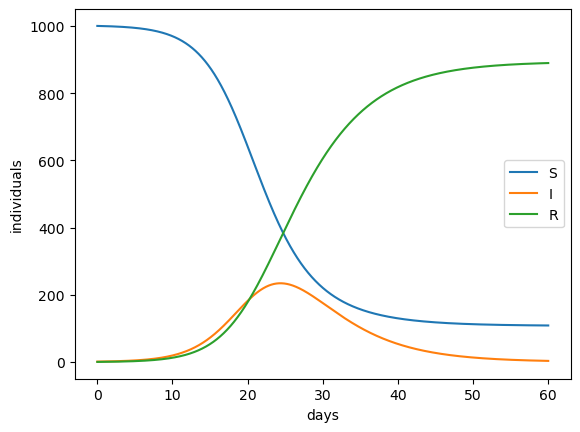

In [3]:
df.plot(ylabel='individuals', xlabel='days')


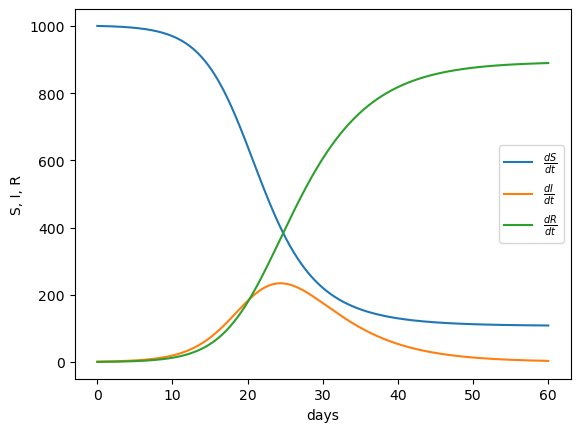

In [4]:
plt.plot(t, v[:,0], label=r'$\frac{dS}{dt}$')
plt.plot(t, v[:,1], label=r'$\frac{dI}{dt}$')
plt.plot(t, v[:,2], label=r'$\frac{dR}{dt}$')
plt.legend()
plt.xlabel('days')
plt.ylabel('S, I, R')
plt.show()